# Lending Club Loan Origination Analysis

**Author: John Min  
Date: November 24, 2019**

## Part 1: Data Exploration & Evaluation

**Executive Summary**

In this section, we explore the following regarding the distribution of the data:
* Funded Amount
* Loan Status
* Issue Date
* Grade

<ins>Methodology</ins>

We present summary statistics on the funded amount and loan status variables. We examine the distribution of the loan funded amount and its relationship with its term. Then, we present a high-level overview of the loan status variable, to get an understanding of our future dependent variable in our modeling exercise.

Then, we do a deeper dive on Issue Date and Grade and present visualizations that depict the variables' distributions as well as some relationships with other variables. We aggregate the funded amount by month (Issue Date) to demonstrate that the portfolio continues to grow month-by-month. Finally, we scrutinize the Grade feature and discover that there is a strong correlation between grade and interest rate.

<ins>Key Findings</ins>
* Loans range from 500 to 40000
* By count, 36-month term loans account for 71% of the portfolio. 60-month term loans account for the remaining 29%.
* By dollar, the 36-month v. 60-month term loans represent 60% and 40% of the portfolio, respectively.
* Out of all dollars lent (34.0 billion), 43.28% has been fully paid, 42.96% is current, and 11.96% has been charged off. 
* The portfolio continues to grow. There may be some seasonality in the business as demonstrated by monthly charts in 2017 and 2018.
* Loan grade is highly reflective of interest rate and loan status. It is not strongly correlated with other features such as funded amount, annual income, debt-to-income ratio.

**Handling Missing Values & Outliers**

<ins>Missing Values</ins>

When computing aggregations, null values are dropped.

<ins>Outliers</ins>

For boxplots that include variables with large outliers such as dti, annual_inc, or revol_bal, we use the showfliers=False parameter. Thus, outliers are not shown and the scaling of the visualizations are maintained. 

Outliers, in boxplots are defined to be values outside of this range: (Q1 - 1.5 \* IQR, Q3 + 1.5 \* IQR).
* Q1: value of the first quartile
* Q3: value of the third quartile
* IQR: interquartile range (the difference between the 25th and 75th percentile values)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns

#style.use('seaborn-poster') #sets the size of the charts
style.use('ggplot')

In [2]:
ls -l ../data/

total 6372472
-rw-r--r--@ 1 john.min  staff       23582 Sep 19 05:27 LCDataDictionary.xlsx
-rw-r--r--@ 1 john.min  staff  1312145408 Sep 19 05:28 database.sqlite
-rw-r--r--@ 1 john.min  staff   755251835 Nov 22 11:05 lending-club-loan-data.zip
-rw-r--r--@ 1 john.min  staff  1189395649 Sep 19 05:30 loan.csv
-rw-r--r--@ 1 john.min  staff         165 Nov 22 11:17 ~$LCDataDictionary.xlsx


In [3]:
cols = ['loan_amnt', 
        'funded_amnt', 
        'term', 
        'int_rate', 
        'grade', 
        'annual_inc', 
        'issue_d', 
        'dti', 
        'revol_bal', 
        'total_pymnt', 
        'loan_status'] 

In [4]:
data = pd.read_csv('../data/loan.csv', usecols = cols)

In [5]:
data.shape

(2260668, 11)

In [6]:
data.describe()

,loan_amnt,funded_amnt,int_rate,annual_inc,dti,revol_bal,total_pymnt
count,2.260668e+06,2.260668e+06,2.260668e+06,2.260664e+06,2.258957e+06,2.260668e+06,2.260668e+06
mean,1.504693e+04,1.504166e+04,1.309291e+01,7.799243e+04,1.882420e+01,1.665846e+04,1.182403e+04
std,9.190245e+03,9.188413e+03,4.832114e+00,1.126962e+05,1.418333e+01,2.294831e+04,9.889599e+03
min,5.000000e+02,5.000000e+02,5.310000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00
25%,8.000000e+03,8.000000e+03,9.490000e+00,4.600000e+04,1.189000e+01,5.950000e+03,4.272580e+03
50%,1.290000e+04,1.287500e+04,1.262000e+01,6.500000e+04,1.784000e+01,1.132400e+04,9.060870e+03
75%,2.000000e+04,2.000000e+04,1.599000e+01,9.300000e+04,2.449000e+01,2.024600e+04,1.670797e+04
max,4.000000e+04,4.000000e+04,3.099000e+01,1.100000e+08,9.990000e+02,2.904836e+06,6.329688e+04


### Loan Funded Amount

We observe the following about the loan amounts:
* Loan amounts range from 500 to 40000. 
* The vast majority of loans range between 5000 and 20000.  
* By count, 71% of the loans have a 36-month term whereas the remaining is 60 months. 
* By dollars, 36-month term loans account for 60% whereas the 60-month loans account for 40%.
* The median amount for the 60-month term (20000) is double that of the 36-month term (10000)

In [7]:
data['funded_amnt'].describe().to_frame().rename(columns={'funded_amnt': 'all terms'})\
    .transpose()\
    .assign(funded_amnt = data['funded_amnt'].sum())\
    .append(
        data.groupby('term')['funded_amnt'].describe()\
            .merge(data.groupby('term')['funded_amnt'].sum(), left_index=True, right_index=True))\
    .assign(amnt_prop = lambda x: x['funded_amnt'] / data['funded_amnt'].sum())

,count,mean,std,min,25%,50%,75%,max,funded_amnt,amnt_prop
all terms,2260668.0,15041.664057,9188.413022,500.0,8000.0,12875.0,20000.0,40000.0,34004208600,1.00000
36 months,1609754.0,12742.965043,8588.925147,500.0,6000.0,10000.0,16800.0,40000.0,20513038950,0.60325
60 months,650914.0,20726.500966,8086.911219,1000.0,14400.0,20000.0,25000.0,40000.0,13491169650,0.39675


### Loan Status

Out of all dollars lent (34.0 billion), 
* 43.28% has been fully paid
* 42.96% is in good/current standing
* 11.96% has been charged off.

In [8]:
status_count = data['loan_status'].value_counts().to_frame().rename(columns={'loan_status': 'count'})
status_count_prop = data['loan_status'].value_counts(normalize=True).to_frame().rename(columns={'loan_status': 'count_proportion'})
status_amnt = data.groupby(['loan_status'])['funded_amnt'].sum().to_frame()
status_amnt_prop = (data.groupby(['loan_status'])['funded_amnt'].sum() / sum(data['funded_amnt'])).to_frame().rename(columns={'funded_amnt': 'dollar_proportion'})
status_summary = status_count\
    .merge(status_count_prop, left_index=True, right_index=True)\
    .merge(status_amnt, left_index=True, right_index=True)\
    .merge(status_amnt_prop, left_index=True, right_index=True)
    
status_summary

,count,count_proportion,funded_amnt,dollar_proportion
Fully Paid,1041952,0.460904,14716206075,0.432776
Current,919695,0.406824,14609002925,0.429623
Charged Off,261655,0.115742,4066320900,0.119583
Late (31-120 days),21897,0.009686,366014950,0.010764
In Grace Period,8952,0.003960,158415150,0.004659
Late (16-30 days),3737,0.001653,63466375,0.001866
Does not meet the credit policy. Status:Fully Paid,1988,0.000879,17254600,0.000507
Does not meet the credit policy. Status:Charged Off,761,0.000337,7037825,0.000207
Default,31,0.000014,489800,0.000014


### Issue Date

While LC continues to expand its lending platform, as we have observed an upward linear trend with respect to funding amounts by month (for both loan terms), we also notice there may be some type of seasonality with respect to loan applications or fund disbursement. The 2017 and 2018 charts by month appear to be similar. Please refer to the charts below.

In [9]:
def compute_monthly_summary(data: pd.DataFrame):
    '''Compute aggregate count and funded amount by month (issue_d)'''
    monthly_amount = data\
        .groupby('issue_d')\
        ['funded_amnt'].sum()\
        .to_frame()\
        .reset_index()\
        .rename(columns={'issue_d': 'date'})

    monthly_count = data['issue_d']\
        .value_counts()\
        .to_frame()\
        .reset_index()\
        .rename(columns={'index': 'date', 'issue_d': 'count'})\
        .assign(datetime = lambda x: x['date'].apply(pd.to_datetime))

    monthly_summary = monthly_amount\
        .merge(monthly_count, on='date')\
        .assign(
            month = lambda x: x['date'].apply(lambda x: x.split('-')[0]),
            year = lambda x: x['date'].apply(lambda x: x.split('-')[1]))\
        .sort_values(by='datetime')
    return monthly_summary

In [10]:
monthly_summary = compute_monthly_summary(data) #all loans
monthly_summary36 = compute_monthly_summary(data[data['term'].str.contains('36')]) #36-month term loans
monthly_summary60 = compute_monthly_summary(data[data['term'].str.contains('60')]) #60-month term loans
monthly_summary_16 = compute_monthly_summary(data[data['issue_d'].str.contains('2016')]) #2016 loans
monthly_summary_17 = compute_monthly_summary(data[data['issue_d'].str.contains('2017')]) #2017 loans
monthly_summary_18 = compute_monthly_summary(data[data['issue_d'].str.contains('2018')]) #2018 loans

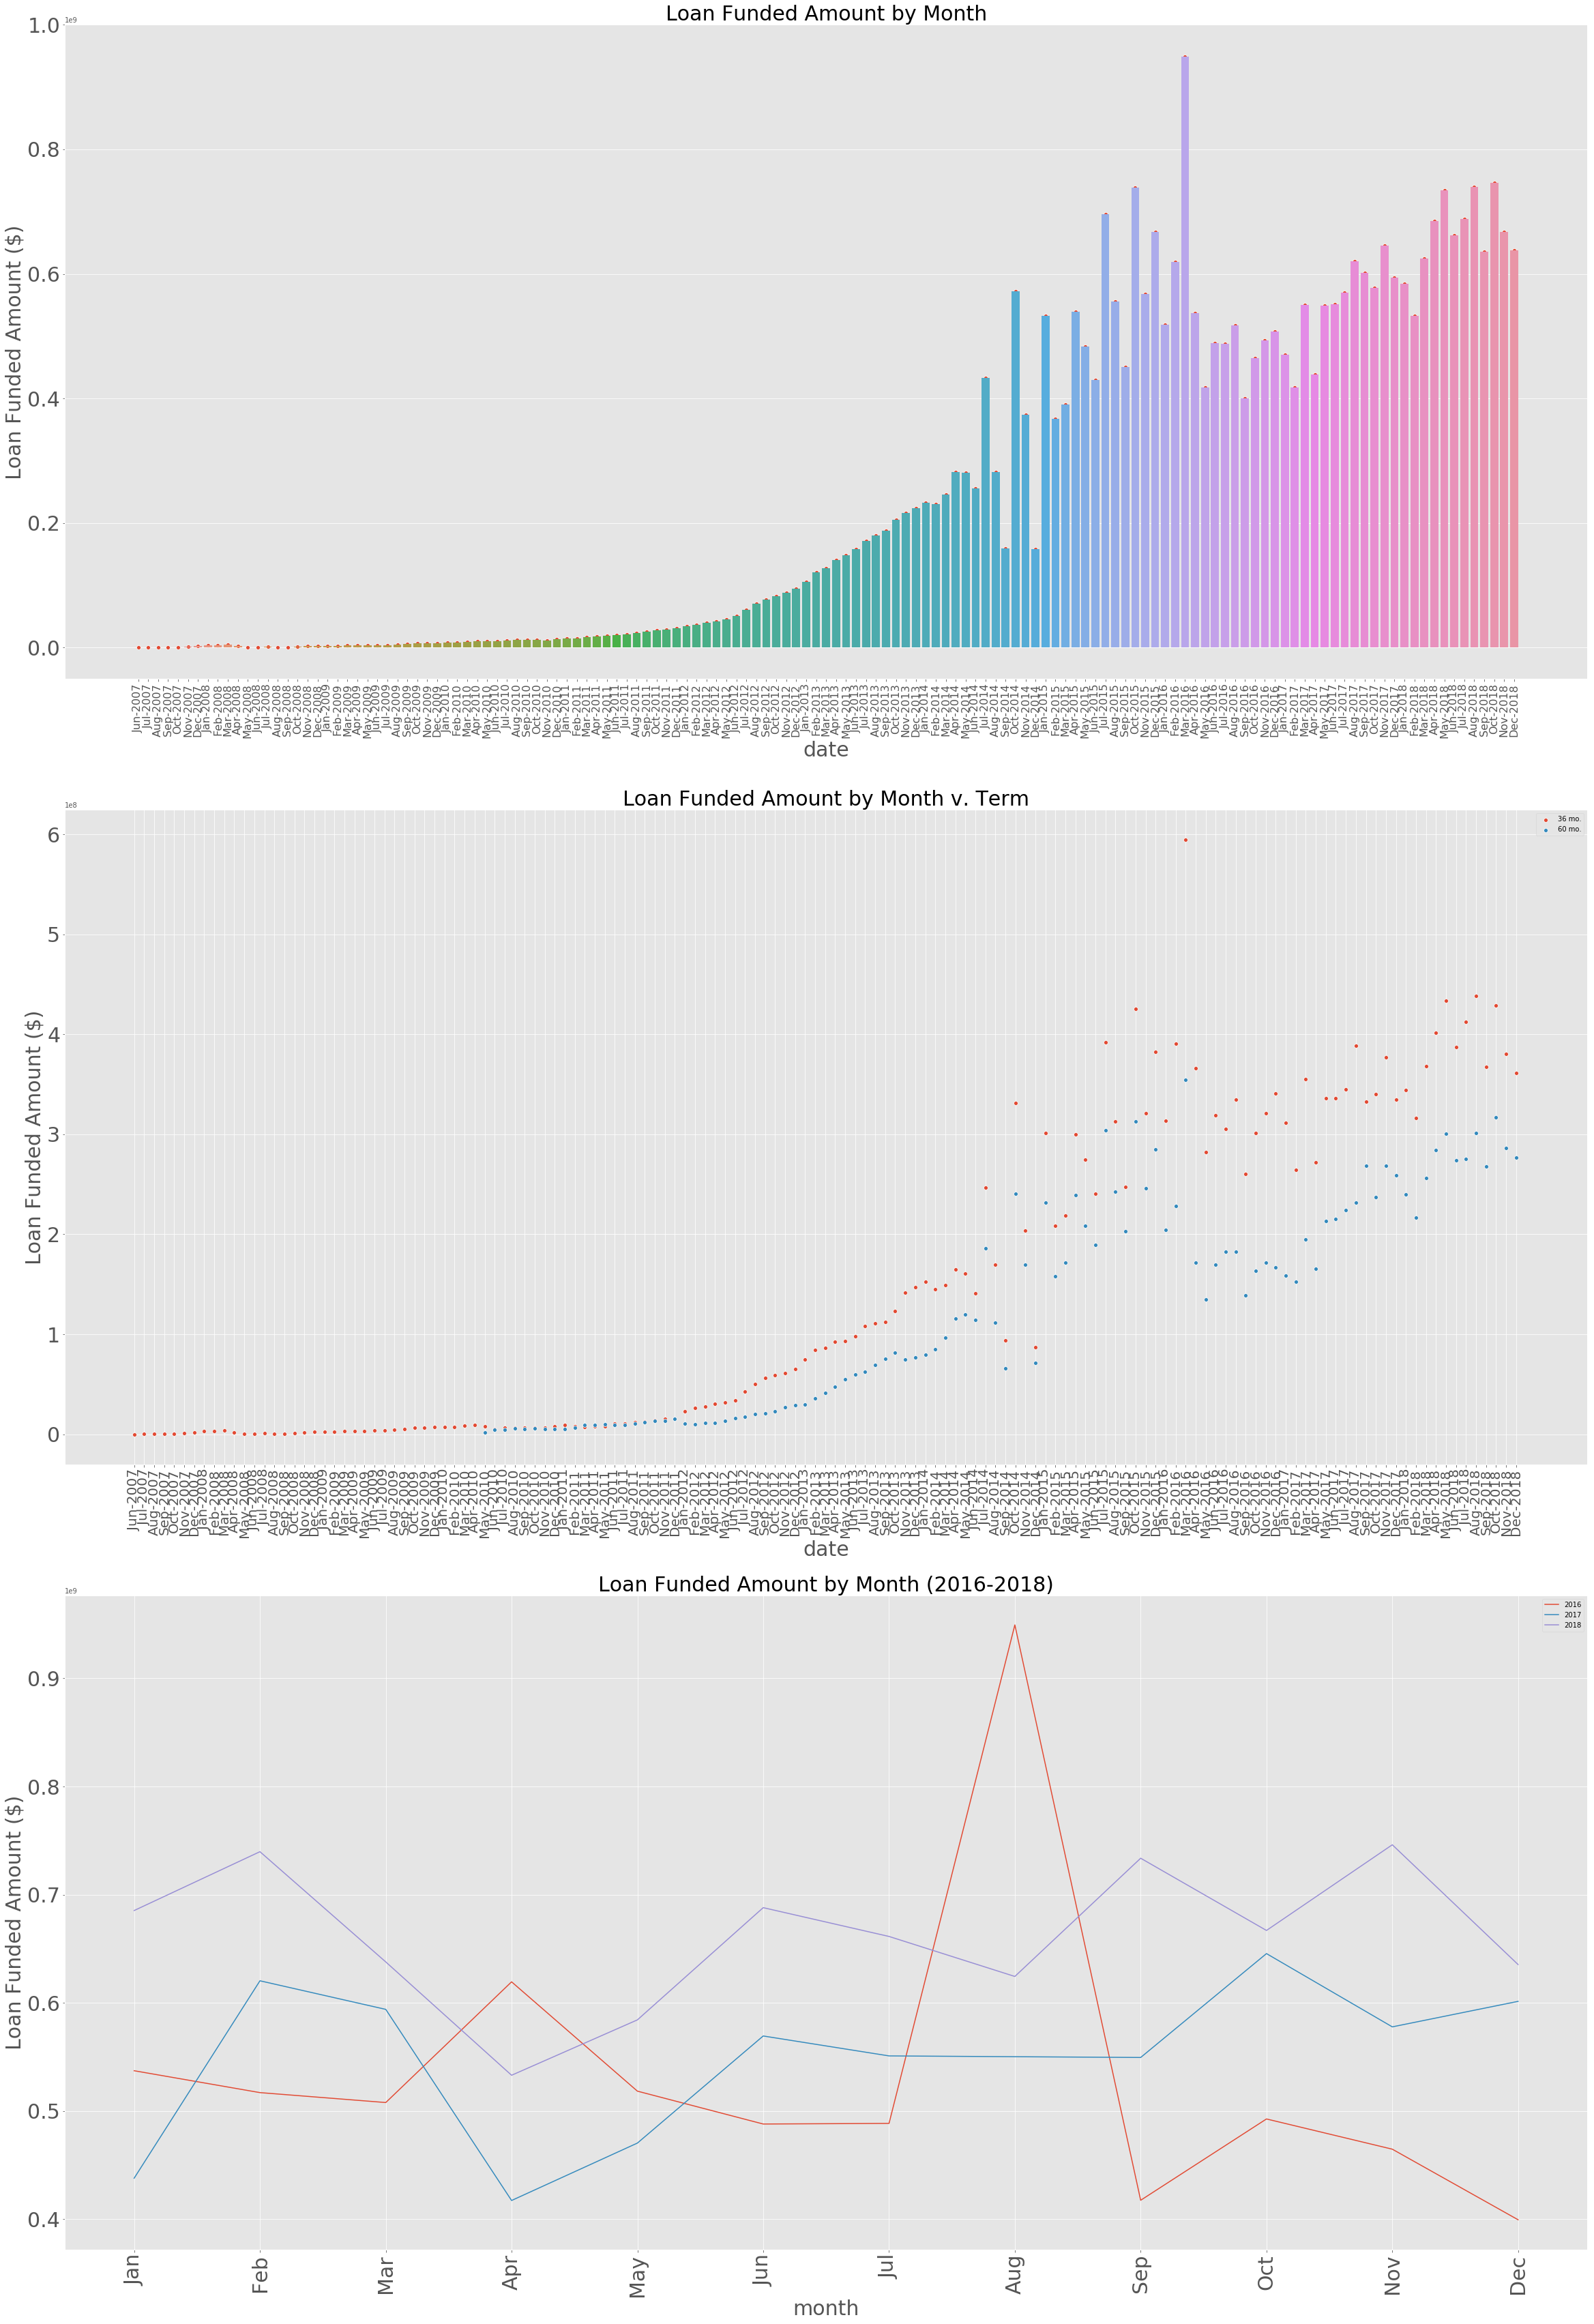

In [11]:
fig, (ax1, ax2, ax3) = plt.subplots(3)
fig.set_size_inches(40,60)
sns.barplot(x = 'date', y = 'funded_amnt', data = monthly_summary, ax=ax1)
sns.scatterplot(x = 'date', y = 'funded_amnt', data = monthly_summary, ax=ax1)
ax1.set_xticklabels(rotation=90, labels = monthly_summary.date, fontsize=16)
ax1.set(ylabel = 'Loan Funded Amount ($)', title = 'Loan Funded Amount by Month')

sns.scatterplot(x='date', y = 'funded_amnt', data=monthly_summary36, label='36 mo.', ax=ax2)
sns.scatterplot(x='date', y = 'funded_amnt', data=monthly_summary60, label='60 mo.', ax=ax2)
ax2.set_xticklabels(rotation=90, labels = monthly_summary.date, fontsize=20)
ax2.set(ylabel = 'Loan Funded Amount ($)', title = 'Loan Funded Amount by Month v. Term')
ax2.legend()

sns.lineplot(x='month', y='funded_amnt', data=monthly_summary_16, label='2016', ax=ax3)
sns.lineplot(x='month', y='funded_amnt', data=monthly_summary_17, label='2017', ax=ax3)
sns.lineplot(x='month', y='funded_amnt', data=monthly_summary_18, label='2018', ax=ax3)
ax3.set_xticklabels(rotation=90, labels = monthly_summary_16.month, fontsize=30)
ax3.set(ylabel = 'Loan Funded Amount ($)', title = 'Loan Funded Amount by Month (2016-2018)')
ax3.legend()

for item in ([ax1.title, ax1.xaxis.label, ax1.yaxis.label,
             ax2.title, ax2.xaxis.label, ax2.yaxis.label,
             ax3.title, ax3.xaxis.label, ax3.yaxis.label] +
             ax1.get_yticklabels() +
             ax2.get_yticklabels() +
             ax3.get_yticklabels()):
    item.set_fontsize(30);

### Grade: LC assigned loan grade

While the majority of loans funded are graded A-D, we observe that the lower quality loans are associated with significantly higher interest rates. In this plot, we also demonstrate that grade is not strongly associated with other fields, in this case, debt-to-income ratio.

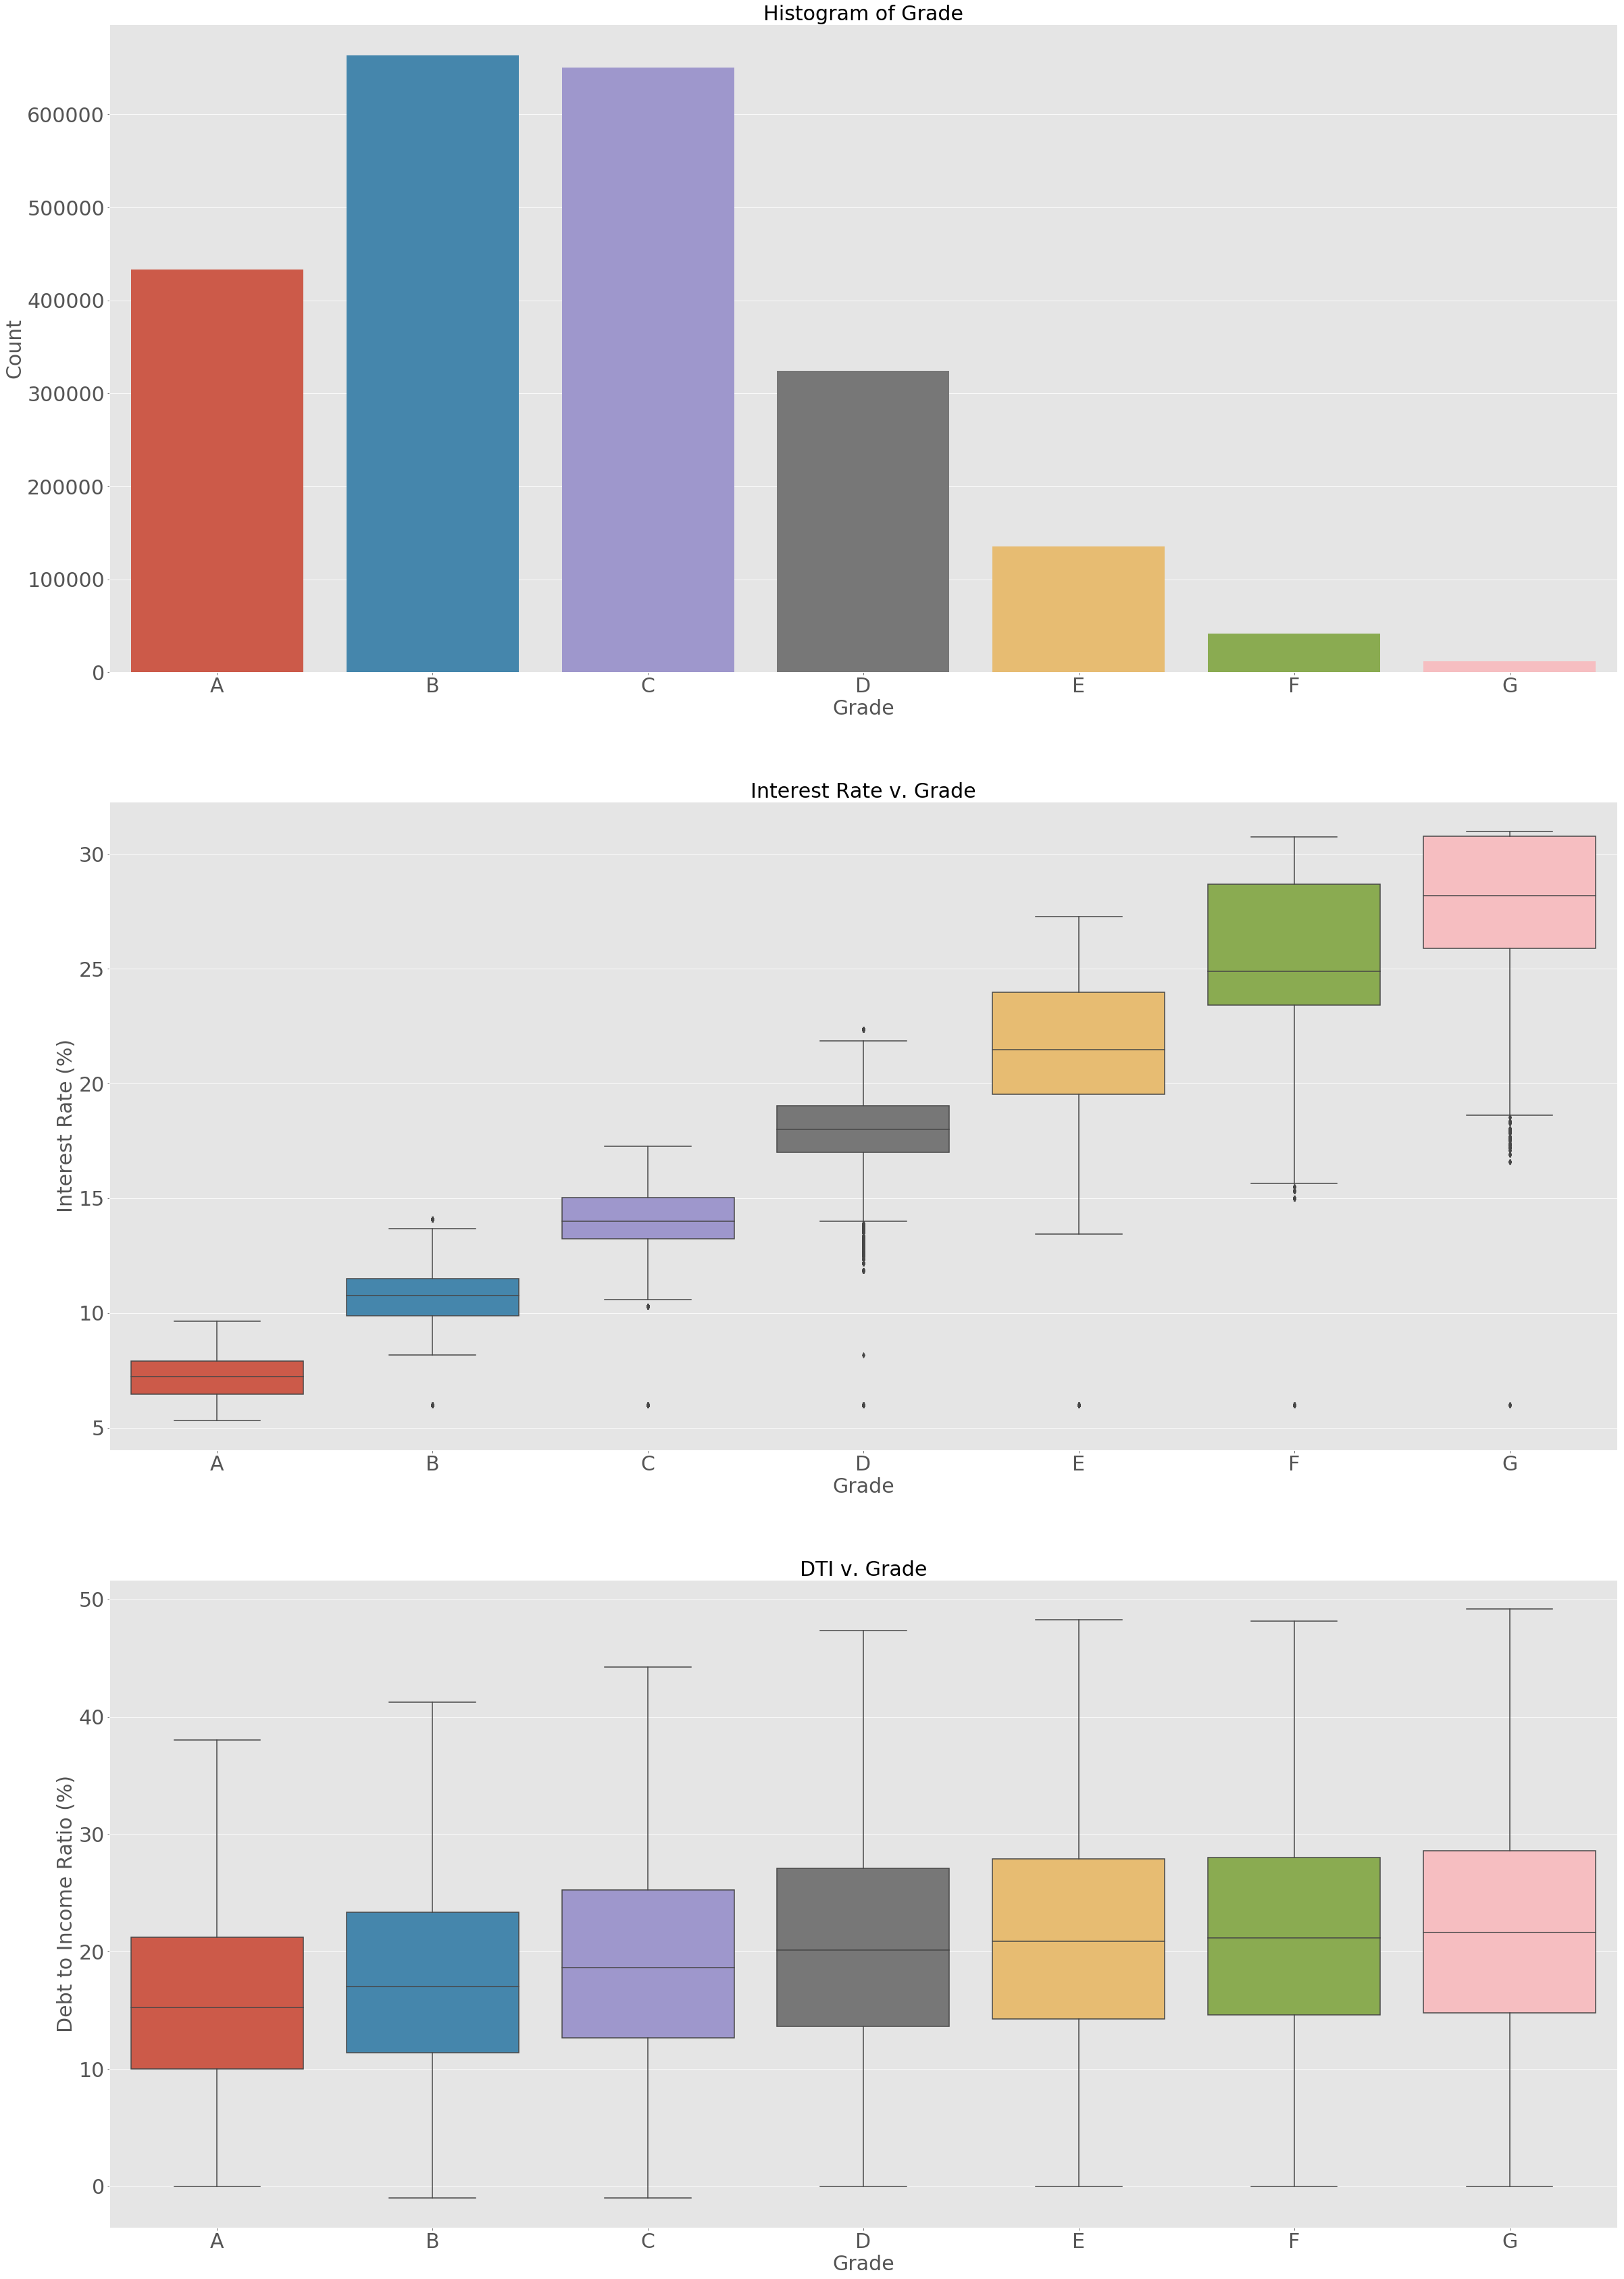

In [12]:
fig, (ax1, ax2, ax3) = plt.subplots(3)
fig.set_size_inches(40, 60)
sns.countplot(data['grade'], order=sorted(data.grade.unique()), ax=ax1)
sns.boxplot(x = 'grade', y = 'int_rate', data=data, order=sorted(data.grade.unique()), ax=ax2)
sns.boxplot(x = 'grade', y = 'dti', data=data, order=sorted(data.grade.unique()), ax=ax3, showfliers=False)
ax1.set(xlabel = 'Grade', ylabel = 'Count', title = 'Histogram of Grade')
ax2.set(xlabel = 'Grade', ylabel = 'Interest Rate (%)', title = 'Interest Rate v. Grade')
ax3.set(xlabel = 'Grade', ylabel = 'Debt to Income Ratio (%)', title = 'DTI v. Grade')
for item in ([ax1.title, ax1.xaxis.label, ax1.yaxis.label,
             ax2.title, ax2.xaxis.label, ax2.yaxis.label,
             ax3.title, ax3.xaxis.label, ax3.yaxis.label] +
             ax1.get_xticklabels() + ax1.get_yticklabels() +
             ax2.get_xticklabels() + ax2.get_yticklabels() +
             ax3.get_xticklabels() + ax3.get_yticklabels()):
    item.set_fontsize(30);